In [24]:
from __future__ import print_function
import os
data_path = ['/']
import pandas as pd
import numpy as np

# Import the data using the file path
filepath = os.sep.join(data_path + ['HR_comma_sep.csv'])
data = pd.read_csv(filepath, sep=',')

In [25]:
mask=data.dtypes==np.object
print(mask)
cat_cols=data.columns[mask]
ohc_cols=(data[cat_cols].apply(lambda x: x.nunique()).sort_values(ascending=False) )

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                     True
salary                    True
dtype: bool


In [26]:
print(ohc_cols)

sales     10
salary     3
dtype: int64


In [30]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
for col in ohc_cols.index:
    data[col] = lb.fit_transform(data[col])
    
    

In [33]:
x_cols = [x for x in data.columns if x != 'salary']
X=data[x_cols]
Y=data['salary']

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42)

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr=LinearRegression()
lr.fit(X_train,Y_train)
pred_train=lr.predict(X_train)
pred_test=lr.predict(X_test)

In [42]:
print('train error',mean_squared_error(Y_train, pred_train))
print('test error',mean_squared_error(Y_test,  pred_test))

train error 0.073786543232
test error 0.0741572211364


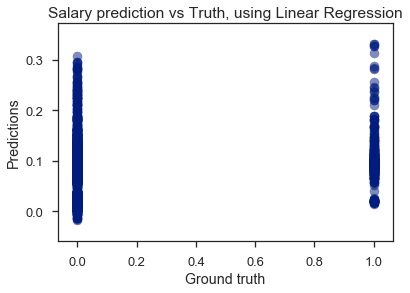

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(Y_test,pred_test,alpha=.5)
ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='Salary prediction vs Truth, using Linear Regression');